# Portfolio Efficient Frontier in Python

## Introduction

Investors often aim at maximizing returns on investment for a given level of risk. This can be achieved by selecting a number of assets in which to invest in so as to minimize the risk and at the same time maximize the returns on investment. An efficient frontier represents a set of optimal portfolios that offer the highest expected returns for a defined level of risk (https://www.investopedia.com/terms/e/efficientfrontier.asp).

In this tutorial, we will demonstrate how to construct an efficient portfolio of a two-asset portfolio bnased on the different weight combimnations of the assets. The assets we will use for this demonstration are two S&P 500 Exchange Traded Funds (ETFs) of XLE and XLI. . We then proceed to select a suitable portfolio combination on the efficient frontier based on the risk tolerance and the required expected returns.

## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Load the Data

We will use the daily closing prices for the two assets for a one year period from 27 November, 2017 to 26 November, 2018 . The data is downloaded from Yahoo Finance and loaded into a Data frame.            b  

In [99]:
#specifying the assets
tickers = ['XLE','XLI']

#specifying the start and end dates
start = "2017-11-27"
end = "2018-11-27"

#downloading price data for the assets
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = yf.download(ticker, start, end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [101]:
#view the data
data.head()

,XLE,XLI
Date,,
2017-11-27,67.190002,71.529999
2017-11-28,67.709999,72.620003
2017-11-29,68.080002,73.260002
2017-11-30,69.099998,74.510002
2017-12-01,69.680000,73.589996


### Plot of the Daily Close Prices

We plot the time series of the daily close prices for the two assets.

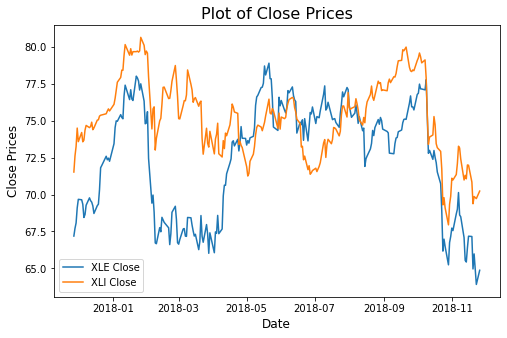

In [102]:
plt.figure(figsize=(8,5))

plt.plot(data.index, data['XLE'], label='XLE Close')
plt.plot(data.index, data['XLI'], label='XLI Close')
plt.title('Plot of Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Prices', fontsize=12)
plt.legend()
plt.show()

## Calculate the Daily Log Returns

The portfolio of the two assets is constructed using the daily returns of each of the assets. We calculate the daily returns of each of the assets using the daily log returns. 

$$R_t=\ln(\frac{P_t}{P_{t-1}})$$

Were, $R_t$ is the log return at time $t$, $P_t$ is the closing price at time $t$ and $P_{t-1}$ is the closing price for the previous day.

In [103]:
#create empty Data Frame for returns
returns = pd.DataFrame()

#calculate daily log returns
for ticker in tickers:
    returns[ticker] = np.log(data[ticker]/data[ticker].shift(1))

#drop rows with NaN
returns = returns.dropna()

In [104]:
returns.head()

,XLE,XLI
Date,,
2017-11-28,0.007709,0.015123
2017-11-29,0.005450,0.008774
2017-11-30,0.014871,0.016919
2017-12-01,0.008359,-0.012424
2017-12-04,-0.000431,0.008390


### Plot of the Daily Log Returns

We plot the time series of the daily log returns for the two assets.

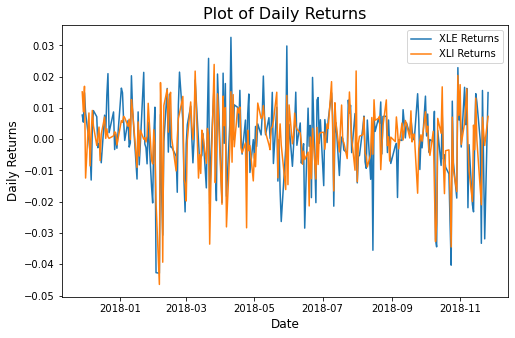

In [105]:
plt.figure(figsize=(8,5))

plt.plot(returns.index, returns['XLE'], label='XLE Returns')
plt.plot(returns.index, returns['XLI'], label='XLI Returns')
plt.title('Plot of Daily Returns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns', fontsize=12)
plt.legend()
plt.show()

## Daily and Annualized Standard Deviation of Returns

In constructing the portfolio, we will use the annualized standard deviations of each asset returns. 

In [106]:
#daily standard deviations
daily_std = returns.std()
daily_std

XLE    0.012810
XLI    0.010772
dtype: float64

In [107]:
#annualized standard deviations
annualized_std = daily_std * np.sqrt(252)
annualized_std

XLE    0.203353
XLI    0.171007
dtype: float64

## Correlation of Returns

We get the correlation of the two asset returns

In [108]:
ret_corr = returns[['XLE', 'XLI']].corr()
ret_corr

,XLE,XLI
XLE,1.000000,0.660426
XLI,0.660426,1.000000


In [109]:
corr_value = np.round(ret_corr['XLE'][1],3)
print('The Correlation between the two assets is:', corr_value)

The Correlation between the two assets is: 0.66


## Construction of an Efficient Frontier

We construct an efficient frontier of portfolio based on the different weight combinations of the two ETFs. Using these weight combinations, we calculate the portfolio expected returns and volatility for each. 

The portfolio expected return is given by the sum of the weighted individual ETF’s returns. 

$$ R_p=w_1 R_1+w_2 R_2$$

Where: $R_p$ is the Expected Portfolio Returns, $R_1$ and $R_2$ are the Expected Returns for the two ETFs and $w_1$ and $w_2$ are the respective weights of the two ETFs.

The Portfolio Volatility is computed using the formula for the Two-Asset Portfolio Volatility as shown below:

$$ σ_p=\sqrt{(w_1^2 σ_1^2+w_2^2 σ_2^2+2w_1 σ_1 w_2 σ_2 ρ_{12} )}$$

Where: $σ_p$ is the Portfolio Volatility, $σ_1$ and $σ_2$ are the respective Volatilities for the two ETFs, $w_1$ and $w_2$ are the respective weights for the two ETFs and $ρ_{12}$ is the correlation between the two ETFs in the portfolio. 



### Portfolio Weights

We define the weights for the various portfolio combinations. 

In [110]:
#define weights for the two ETFs
w1=np.linspace(0,1,11)
w2=np.linspace(1,0,11)

In [111]:
#construct a dataframe of weights
weights_df = pd.DataFrame()

weights_df['XLE Weight'] = w1
weights_df['XLI Weight'] = w2

weights_df

,XLE Weight,XLI Weight
0,0.0,1.0
1,0.1,0.9
2,0.2,0.8
3,0.3,0.7
4,0.4,0.6
5,0.5,0.5
6,0.6,0.4
7,0.7,0.3
8,0.8,0.2
9,0.9,0.1


### Portfolio Returns and Volatilities

In [112]:
annualized_std

XLE    0.203353
XLI    0.171007
dtype: float64

In [113]:
#volatilities
xle_vol = annualized_std[0]
xli_vol = annualized_std[1]

In [114]:
xle_vol, xli_vol

(0.20335309806894042, 0.1710067876397469)

In [115]:
#correlation
cor=corr_value
cor

0.66

### Expected Returns using Capital Asset Pricing Model (CAPM)

The Expected return for each asset using the CAPM is calculated as follows:

$$ E(R_i )=R_f+\beta(R_m-R_f)$$

Where:
       
$ E(R_i)$ is the expected return for the upcoming year of the asset

$ R_f $ is the risk-free rate of return = 2.25%

$ \beta $ is the Beta Value of an asset = 1.07 for XLE and 1.06 for XLI

$ R_m $ is the is the Market Rate of Return = 9.0%

In [118]:
# Define Variables
beta_xle = 1.07 #Beta Value of XLE
beta_xli = 1.06 #Beta Value of XLI
risk_free_rate = 0.0225 # Risk Free Rate
market_return = 0.09 #Market Return
market_std = 0.15 #Market Standard Deviation

In [119]:
# Expected Return of XLE
ret_xle = risk_free_rate + beta_xle * (market_return - risk_free_rate)

# Expected Return of XLI
ret_xli = risk_free_rate + beta_xli * (market_return - risk_free_rate)

# Expected Return of S&P 500
ret_sp500 = risk_free_rate + 1 * (market_return - risk_free_rate) #Market beta is 1

In [120]:
xle_ret=ret_xle
xli_ret=ret_xli

xle_ret, xli_ret

(0.094725, 0.09405)

In [121]:
#Compure Returns and Volatility for each combination

portfolio = weights_df.copy()

#portfolio Returns
portfolio['Portfolio Returns'] = ((portfolio['XLE Weight']*xle_ret) + (portfolio['XLI Weight']*xli_ret))

#portfolio volatility
portfolio['Volatility'] = np.sqrt(((portfolio['XLE Weight'])**2 * xle_vol**2) + 
                              ((portfolio['XLI Weight'])**2 * xli_vol**2) +
                              (2 * (portfolio['XLE Weight']) * xle_vol *
                              (portfolio['XLI Weight']) * xli_vol) * cor)

In [122]:
portfolio

,XLE Weight,XLI Weight,Portfolio Returns,Volatility
0,0.0,1.0,0.094050,0.171007
1,0.1,0.9,0.094117,0.168023
2,0.2,0.8,0.094185,0.166476
3,0.3,0.7,0.094252,0.166405
4,0.4,0.6,0.094320,0.167811
5,0.5,0.5,0.094387,0.170659
6,0.6,0.4,0.094455,0.174878
7,0.7,0.3,0.094522,0.180372
8,0.8,0.2,0.094590,0.187029
9,0.9,0.1,0.094658,0.194728


## Portfolio Efficient Frontier

From the above table, we construct the Efficient Frontier for each portfolio weights combination. The figure below shows the scatter plot for the constructed Efficient Frontier of the portfolios


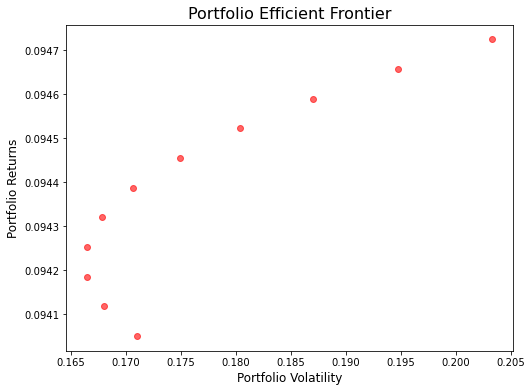

In [132]:
## Plot of the Portfolio Efficient Frontier

plt.figure(figsize= (8,6))

plt.title('Portfolio Efficient Frontier', fontsize=16)
plt.scatter(portfolio['Volatility'], 
            portfolio['Portfolio Returns'],color='r', alpha=0.6)

plt.xlabel('Portfolio Volatility', fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=12)

plt.show()

## Selecting a Portfolio with Defined Constraints

From the constructed Efficient Frontier above, we choose our portfolio with the following constraints:
- The Return greater than 9.43% and
- The Volatility not exceeding 16.8%.
We achieve this by constructing the threshold lines for returns and volatility on our Efficient Frontier plot as shown below:


In [135]:
#Define the Portfolio Constraints
Vol_threshold = 0.168
return_threshold = 0.0943
n = len(portfolio)

In [145]:
# Data ponts
points = []
for i, j in zip(portfolio['Volatility'], portfolio['Portfolio Returns']):
    points.append((i,j))                       

# Portfolio Weights, (xle, xli)
w = []
for i, j in zip(portfolio['XLE Weight'], portfolio['XLI Weight']):
    w.append((np.round(i,1), np.round(j,1)))

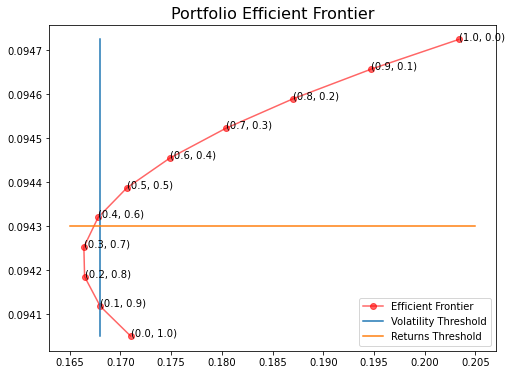

In [146]:
#Plot of the Portfolio Efficient Frontier with the Constraints

plt.figure(figsize= (8,6))

plt.title('Portfolio Efficient Frontier', fontsize=16)

plt.plot(portfolio['Volatility'], portfolio['Portfolio Returns'],'-or', 
         alpha=0.6, label='Efficient Frontier')

plt.plot(n * [Vol_threshold], portfolio['Portfolio Returns'],
        label = 'Volatility Threshold')

plt.plot(np.linspace(0.165,0.205,11), n * [return_threshold],
        label = 'Returns Threshold')

for i, j in zip(points, w):
    plt.text(i[0],i[1],j)

plt.legend()
plt.show()

From the plot above, we want to pick a portfolio with returns greater than 9.43% which lies above the Returns Threshold Line. The portfolio should also have a Volatility not exceeding 16.8% meaning it should lie on the Volatility Threshold line or to the left side of it. We can see from the plot that the only combination which satisfies the above constraints is the portfolio with 40% XLE and 60% XLI. 